In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

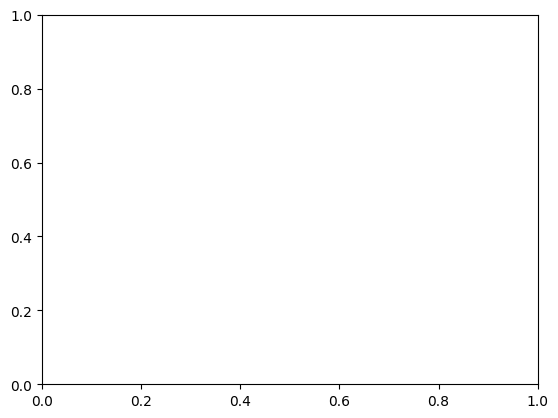

In [2]:
fig,axs = plt.subplots()

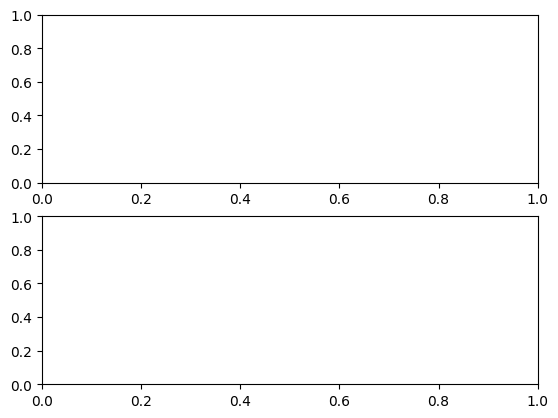

In [3]:
fig,axs = plt.subplots(2)

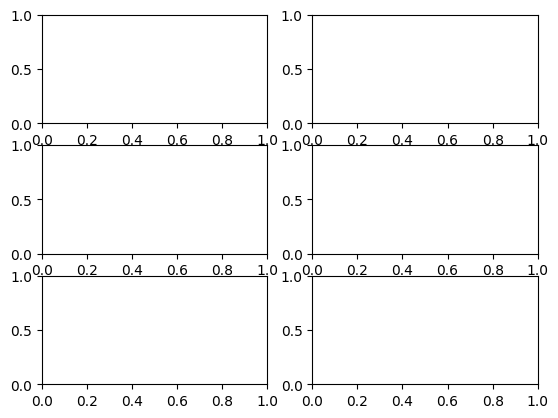

In [4]:
fig,axs = plt.subplots(3,2)

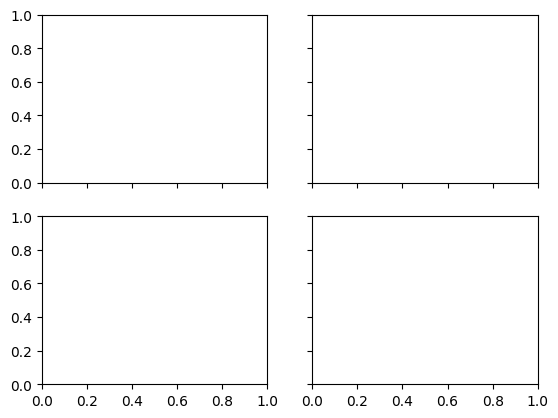

In [6]:
fig,axs = plt.subplots(2,2,sharex=True,sharey=True)

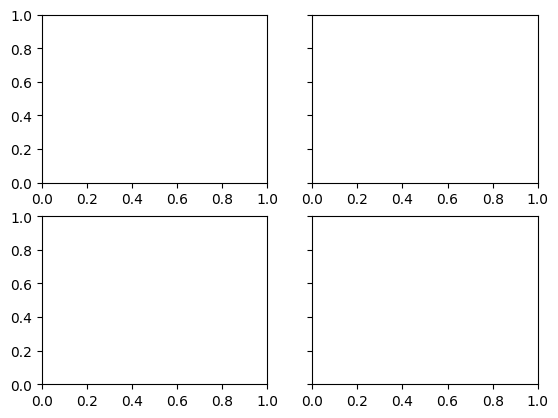

In [7]:
fig,axs = plt.subplots(2,2,sharex=False,sharey=True)

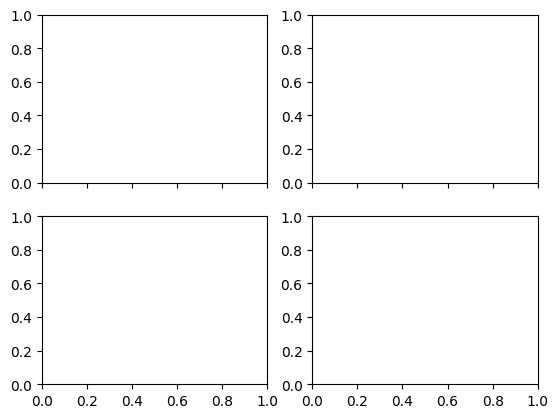

In [8]:
fig,axs = plt.subplots(2,2,sharex=True,sharey=False)

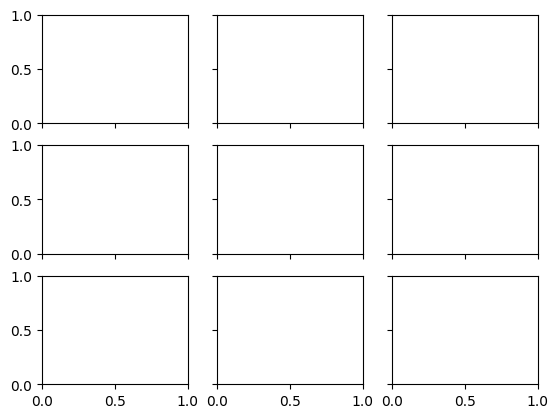

In [75]:
fig,axs = plt.subplots(3,3,sharex='col',sharey=True)

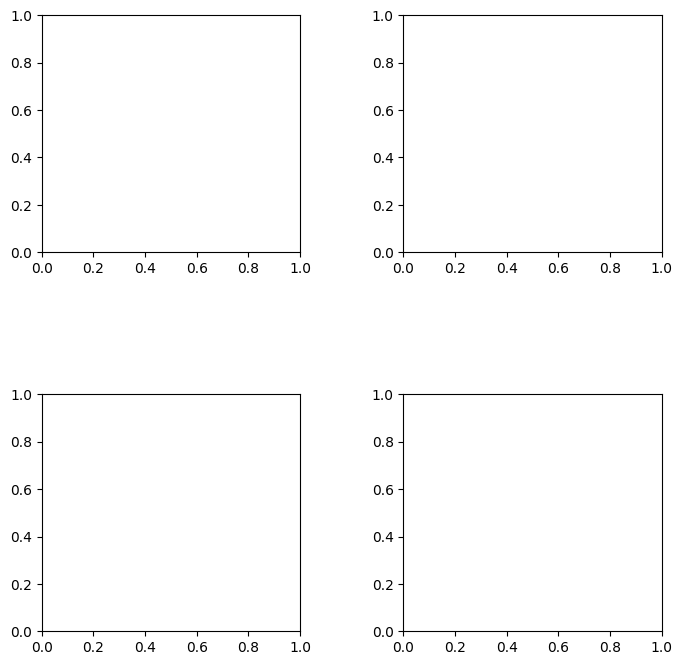

In [15]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
plt.subplots_adjust(wspace=0.4,hspace=0.6)

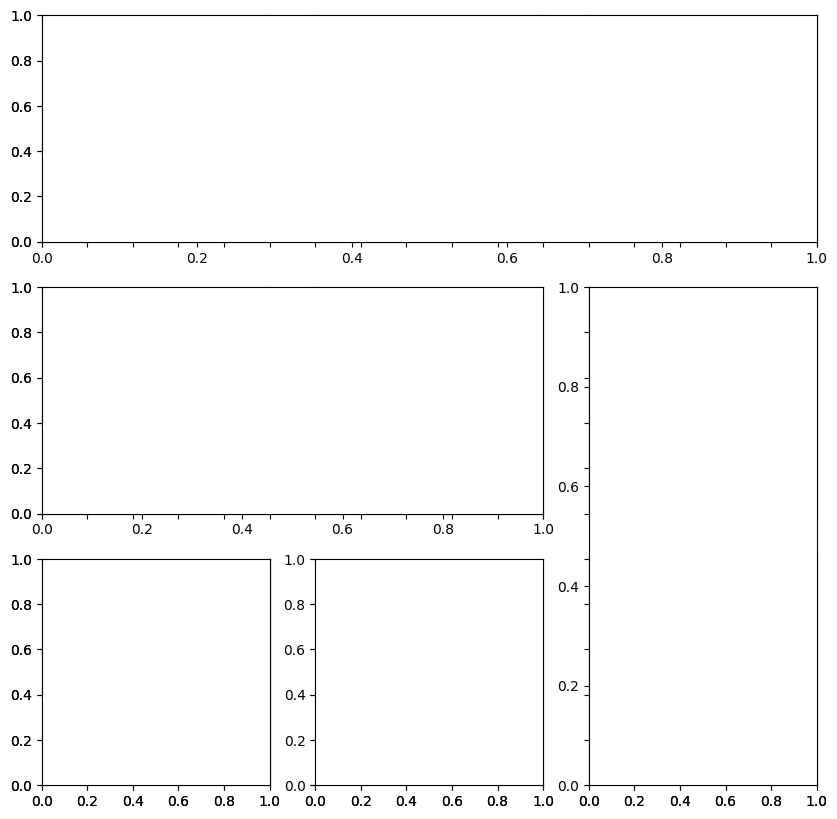

In [23]:
fig,axs = plt.subplots(3,3,figsize=(10,10),sharex=True,sharey=True)
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2)
ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2)
ax4 = plt.subplot2grid((3,3),(2,0))
ax5 = plt.subplot2grid((3,3),(2,1))

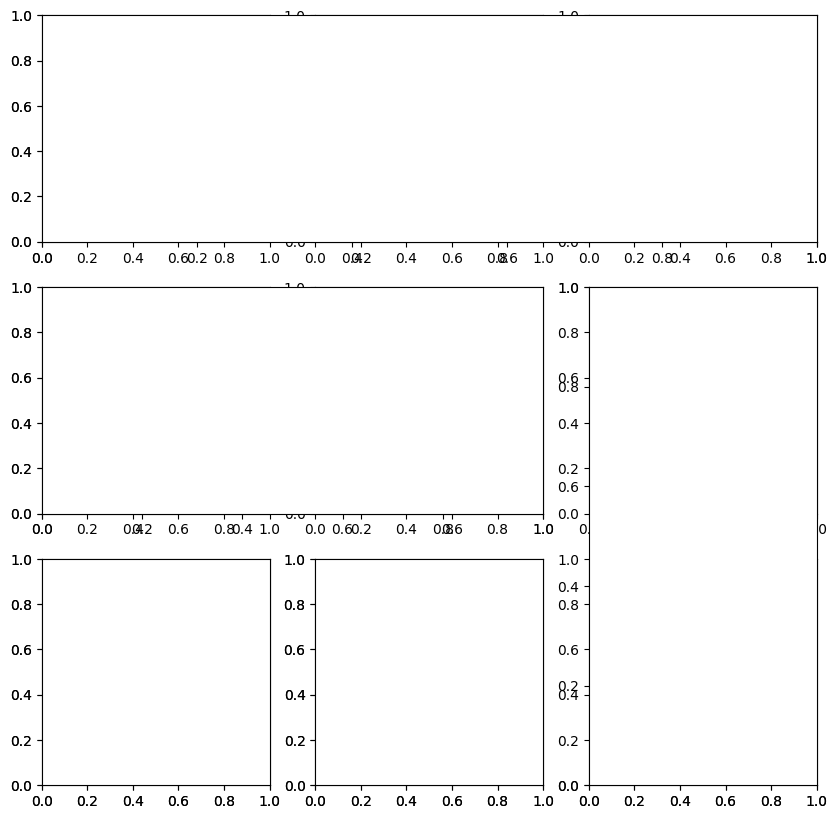

In [24]:
fig,axs = plt.subplots(3,3,figsize=(10,10),sharex=False,sharey=False)
ax1 = plt.subplot2grid((3,3),(0,0),colspan=3)
ax2 = plt.subplot2grid((3,3),(1,0),colspan=2)
ax3 = plt.subplot2grid((3,3),(1,2),rowspan=2)
ax4 = plt.subplot2grid((3,3),(2,0))
ax5 = plt.subplot2grid((3,3),(2,1))

In [25]:
users_net = pd.read_csv('/content/1692688523556-InternetUsers.csv',encoding='UTF-8-sig',sep=',')
users_net.head()

,Country Name,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.000000,2.768383,NaN,...,62.0,69.0,74.000000,78.9,83.78,88.661227,93.542454,97.170000,NaN,NaN
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,...,4.0,5.0,5.454545,5.9,7.00,8.260000,NaN,11.447688,NaN,NaN
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.000000,0.000776,0.005674,...,2.8,3.1,6.500000,8.9,21.40,12.400000,13.000000,14.339079,NaN,NaN
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.011169,0.032197,0.048594,...,45.0,49.0,54.655959,57.2,60.10,63.252933,66.363445,71.847041,NaN,69.642855
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.000000,1.526601,3.050175,...,81.0,81.0,86.434425,94.0,95.90,96.910000,97.930637,91.567467,NaN,NaN


In [30]:
mexico = users_net[users_net['Country Name']=='Mexico']
mexico.drop(columns='Country Code',inplace=True)
mexico.set_index('Country Name',inplace=True)
mexico = mexico.T
mexico.index.name = 'Year'
mexico.columns = ['Internet Users']
mexico.head()

<ipython-input-30-dafed4dd8a09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mexico.drop(columns='Country Code',inplace=True)


,Internet Users
Year,
1990,0.000000
1991,0.005881
1992,0.017308
1993,0.028305
1994,0.043339


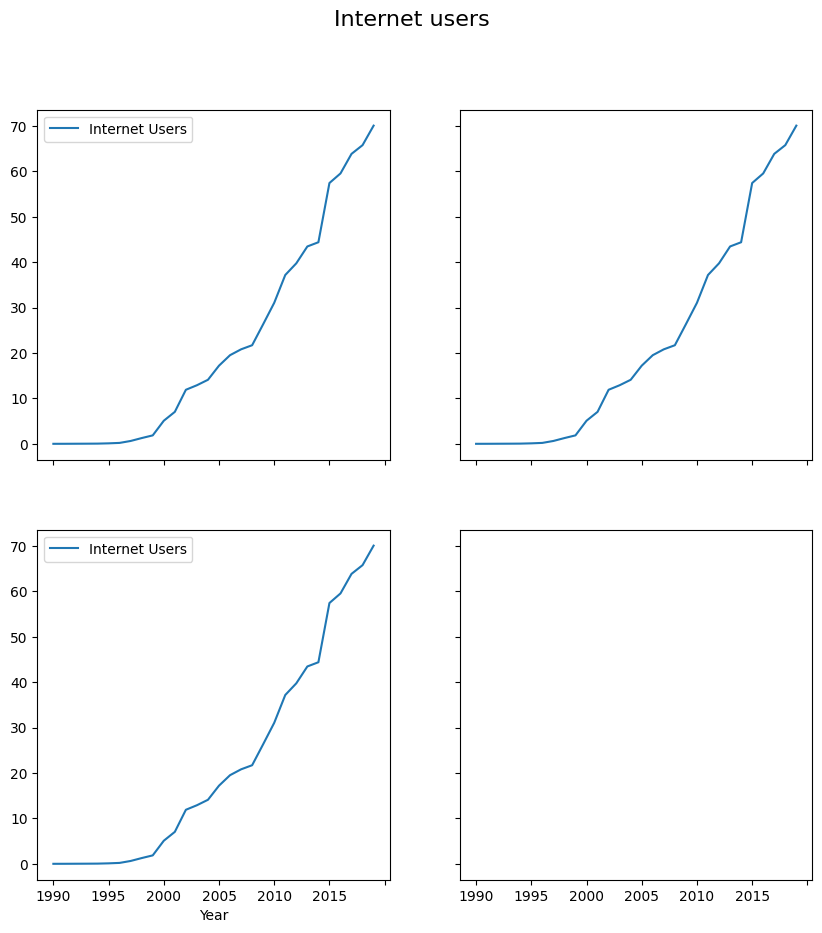

In [44]:
fig,axs = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
fig.suptitle('Internet users',fontsize=16)

##grafica con matplotlib
axs[0,1].plot(mexico)
axs[0,1].set_xticks(np.arange(0,len(mexico)+1,5))

##grafica con pandas
mexico.plot(ax=axs[0,0])

##graficar con seaborn
sns.lineplot(data=mexico,ax=axs[1,0])
axs[1,0].set_xticks(np.arange(0,len(mexico)+1,5))


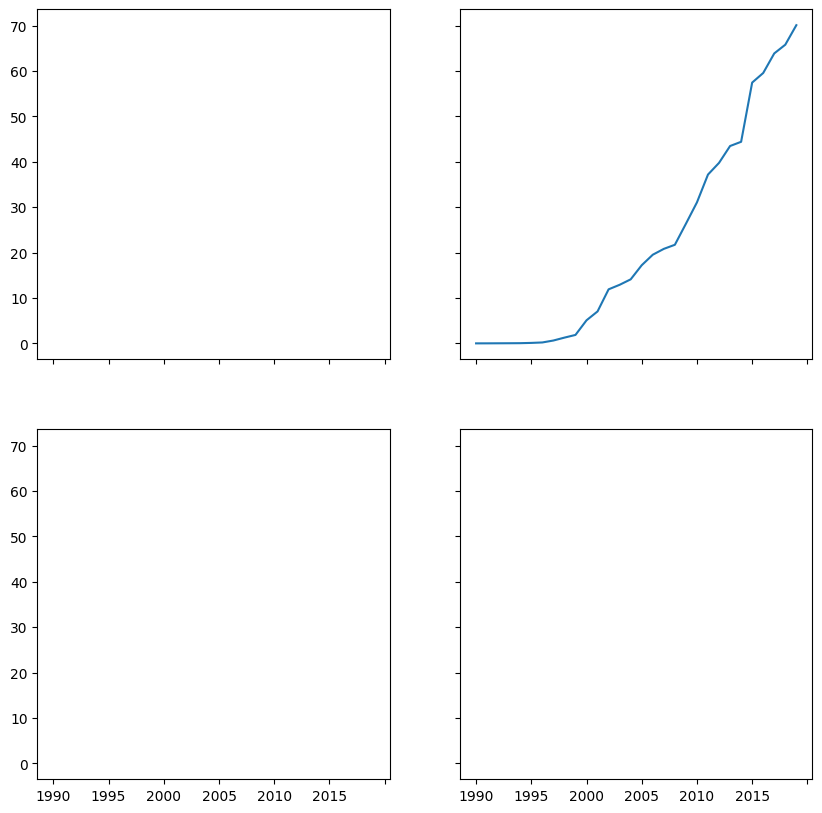

In [50]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)

ax2.plot(mexico)
ax2.set_xticks(np.arange(0,len(mexico)+1,5))


/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


Text(0.5, 1.0, 'Min/Max references')

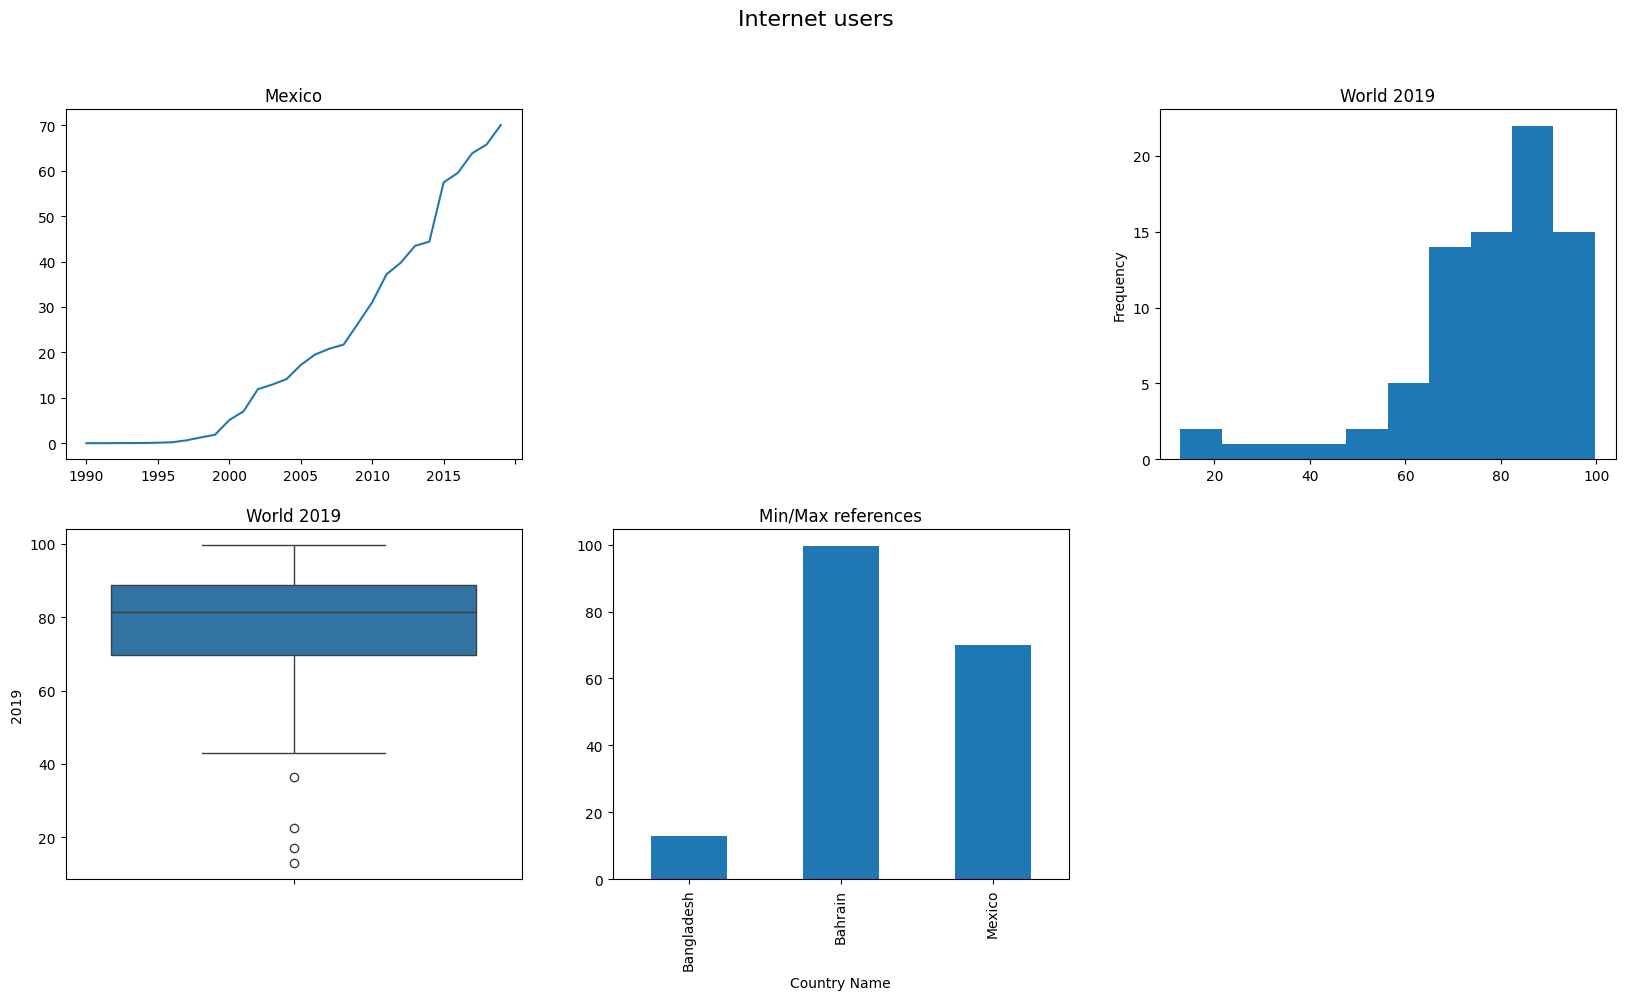

In [60]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Internet users',fontsize=16)

ax1 = fig.add_subplot(231)
ax1.plot(mexico)
ax1.set_xticks(np.arange(0,len(mexico)+1,5))
ax1.set_title('Mexico')

ax2 = fig.add_subplot(233)
users_net['2019'].plot.hist(ax=ax2)
ax2.set_title('World 2019')

ax3 = fig.add_subplot(234)
sns.boxplot(y='2019',data=users_net,orient='h',ax=ax3)
ax3.set_title('World 2019')

ax4 = fig.add_subplot(235)
ref = users_net[(users_net['Country Code']=='MEX') | (users_net['2019']==users_net['2019'].min()) | (users_net['2019']==users_net['2019'].max())]
ref.set_index('Country Name',inplace=True)
ref = ref.drop('Country Code',axis=1)
ref['2019'].plot(kind='bar',ax=ax4)
ax4.set_title('Min/Max references')

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

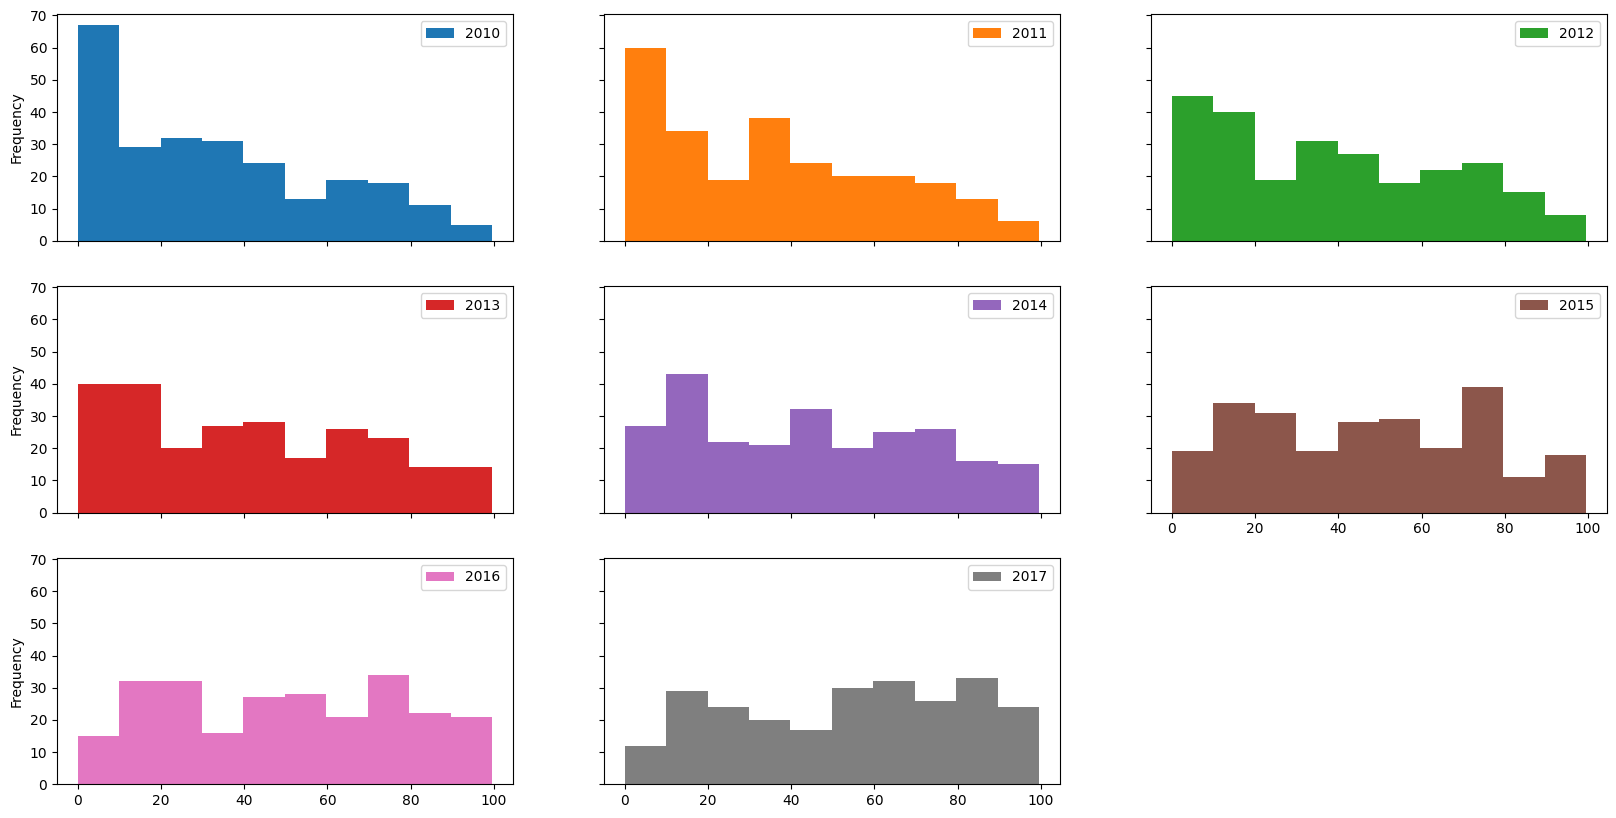

In [65]:
## pandas normal

users_net.loc[:,'2010':'2017'].plot.hist(subplots=True,layout=(3,3),figsize=(20,10),sharey=True)

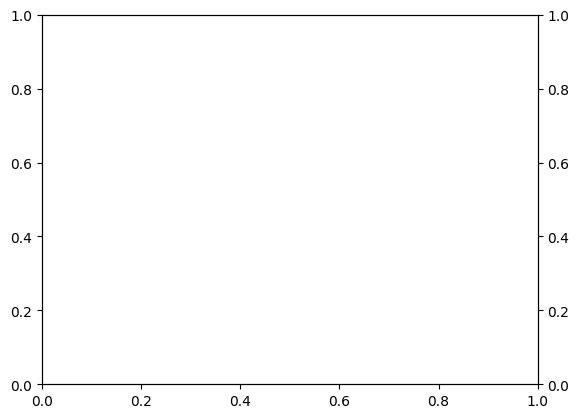

In [76]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

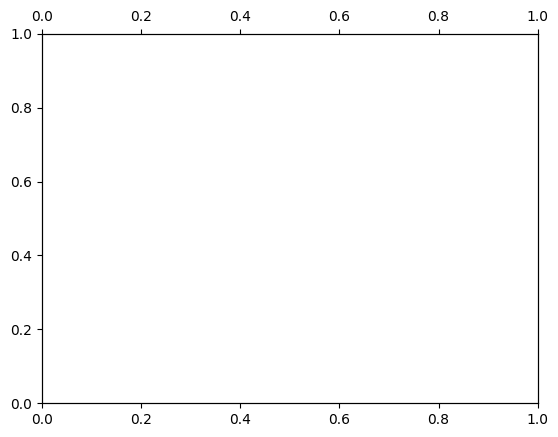

In [77]:
fig,ax1 = plt.subplots()
ax2 = ax1.twiny()

In [78]:
gni = pd.read_csv('/content/1697051467887-GNI.csv',encoding='UTF-8-sig',sep=',')
gni.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22370.0,22450.0,23520.0,24420.0,25190.0,26250.0,26560.0,26810.0,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,510.0,530.0,630.0,660.0,630.0,600.0,550.0,530.0,520.0,530.0
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3230.0,3410.0,4170.0,4780.0,5010.0,4520.0,3770.0,3450.0,3210.0,2960.0
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4360.0,4410.0,4360.0,4540.0,4540.0,4390.0,4320.0,4290.0,4860.0,5220.0
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
gniMexico = gni[gni['Country Name']=='Mexico']
gniMexico.drop(columns='Country Code',inplace=True)
gniMexico.set_index('Country Name',inplace=True)
gniMexico = gniMexico.T
gniMexico.index.name = 'Year'
gniMexico.columns = ['Gni']
gniMexico = gniMexico.reset_index()
gniMexico = gniMexico[gniMexico['Year'].astype(float)>=1990]
gniMexico.set_index('Year',inplace=True)
gniMexico.head()

<ipython-input-93-4811479e550b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gniMexico.drop(columns='Country Code',inplace=True)


,Gni
Year,
1990,2790.0
1991,3250.0
1992,3770.0
1993,4490.0
1994,5310.0


<Axes: xlabel='Year'>

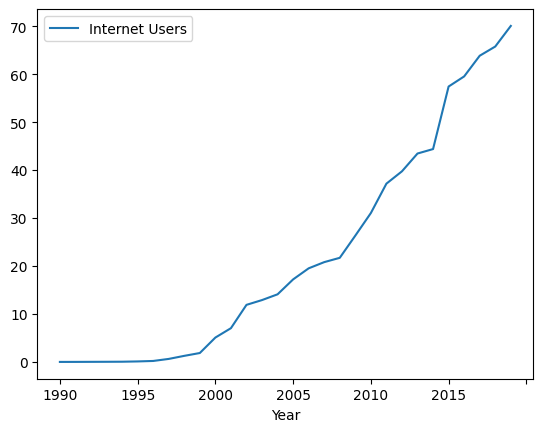

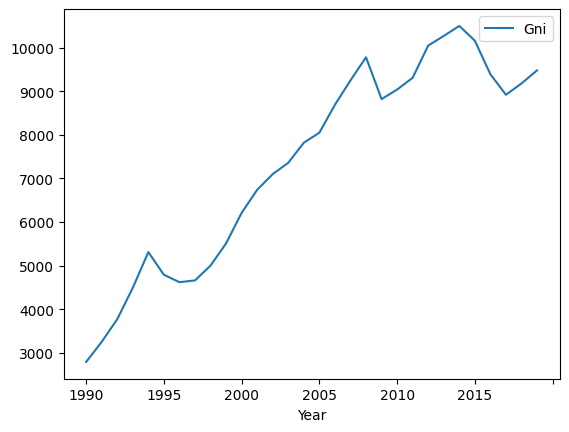

In [94]:
mexico.plot()
gniMexico.plot()

In [95]:
## primera opción haciendo merge de los dataframe

merged_Df = pd.merge(left=mexico,right=gniMexico,left_index=True,right_index=True)
merged_Df.head()

,Internet Users,Gni
Year,,
1990,0.000000,2790.0
1991,0.005881,3250.0
1992,0.017308,3770.0
1993,0.028305,4490.0
1994,0.043339,5310.0


<Axes: xlabel='Year'>

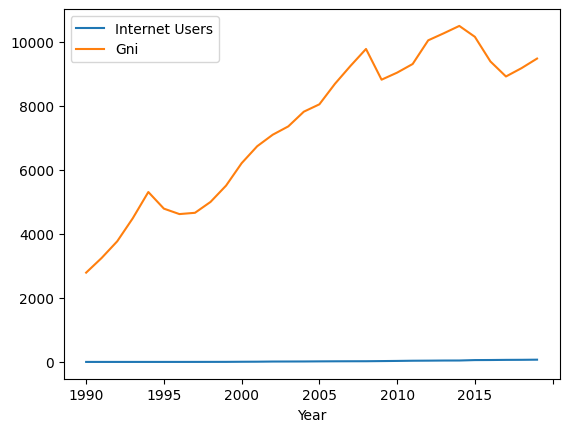

In [96]:
## pandas normal con el merge de los datos
merged_Df.plot()

<Axes: xlabel='Year'>

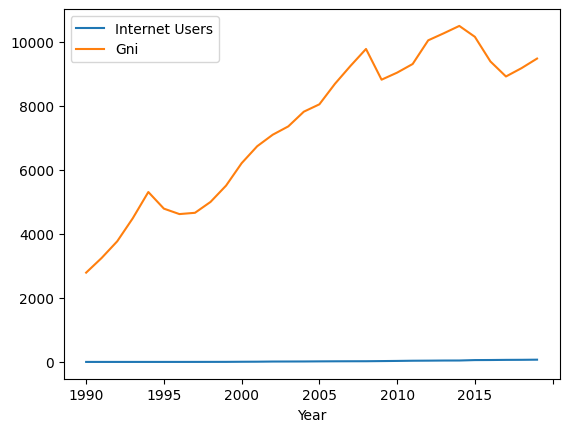

In [97]:
## con el merge de los datos como subgrafica

ax1 = mexico.plot()
gniMexico.plot(ax=ax1)


Text(0, 0.5, 'Gni')

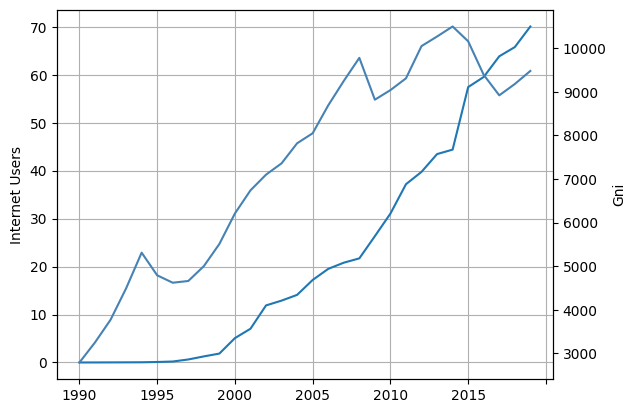

In [101]:
## ejes duales con matplotlib

fig,ax1 = plt.subplots()

ax1.plot(mexico.index,mexico.values,label='Internet Users')
ax1.set_xticks(np.arange(0,len(mexico)+1,5))
ax1.set_ylabel('Internet Users')
plt.grid()

ax2 = ax1.twinx()
ax2.plot(gniMexico.index,gniMexico.values,label='Gni',color='steelblue')
ax2.set_ylabel('Gni')

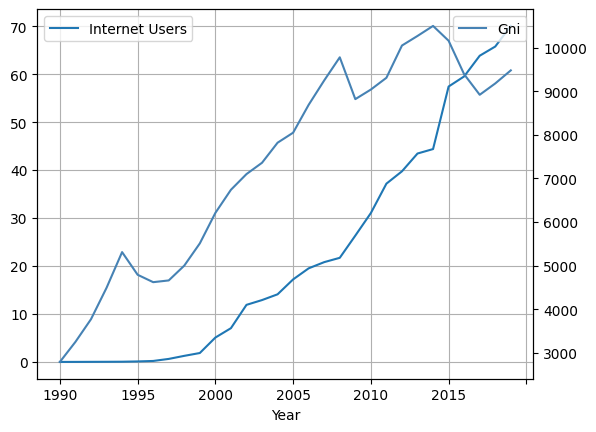

In [103]:
## ejes duales con pandas

ax1 = mexico.plot()
ax1.legend(loc='upper left')
plt.grid()

ax2 = ax1.twinx()
gniMexico.plot(ax=ax2,label='Gni',color='steelblue')
ax2.legend(loc='upper right')

Text(0, 0.5, 'Gni')

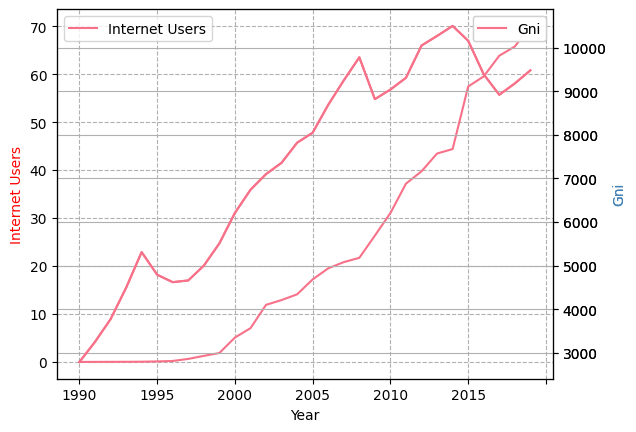

In [117]:
## ejes duales con seaborn
sns.set_palette("husl")

ax1 = sns.lineplot(data=mexico,color='red')
ax1.set_xticks(np.arange(0,len(mexico)+1,5))
ax1.set_ylabel('Internet Users',color='r')
ax1.grid(linestyle='--')

ax2 = ax1.twinx()
sns.lineplot(data=gniMexico,ax=ax2,color='blue')
ax2.set_ylabel('Gni',color='steelblue')
plt.grid()

ax2=ax1.twinx()
sns.lineplot(data=gniMexico,ax=ax2,color='blue')
ax2.set_ylabel('Gni',color='steelblue')


([<matplotlib.axis.YTick at 0x7b1ad3f37890>,
 [Text(0, 0, '1990'),
  Text(0, 5, '1995'),
  Text(0, 10, '2000'),
  Text(0, 15, '2005'),
  Text(0, 20, '2010'),
  Text(0, 25, '2015'),
  Text(0, 30, '')])

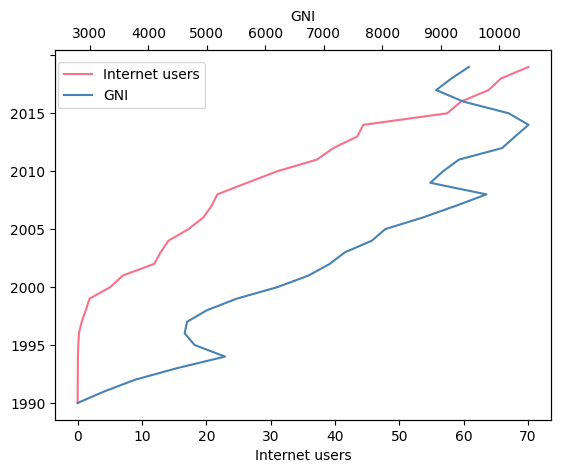

In [118]:
fig,ax1 = plt.subplots()

ax1.plot(mexico.values,mexico.index,label='Internet users')
ax1.set_xlabel('Internet users')

ax2 = ax1.twiny()
ax2.plot(gniMexico.values,gniMexico.index,label='GNI',color='steelblue')
ax2.set_xlabel('GNI')

fig.legend(bbox_to_anchor=(0.37,0.87))
plt.yticks(np.arange(0,len(mexico)+1,5))

In [120]:
LifeExpectancyMale = pd.read_csv('/content/1696621758438-LifeExpectancyMale.csv',encoding='UTF-8-sig',sep=',')
LifeExpectancyMale.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,64.084,64.429,64.747,65.053,65.356,65.660,65.959,66.242,...,72.517,72.654,72.792,72.930,73.069,73.208,73.348,73.488,73.628,73.768
1,Afghanistan,AFG,31.718,32.224,32.724,33.216,33.700,34.180,34.656,35.133,...,59.683,60.190,60.675,61.133,61.563,61.965,62.343,62.701,63.047,63.382
2,Angola,AGO,36.305,36.582,36.874,37.181,37.501,37.833,38.177,38.532,...,52.848,53.790,54.660,55.447,56.140,56.737,57.242,57.677,58.064,58.416
3,Albania,ALB,61.309,62.272,63.117,63.811,64.346,64.723,64.962,65.116,...,74.145,74.552,74.966,75.364,75.734,76.066,76.353,76.601,76.816,77.002
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
LifeExpectancyMaleMexico = LifeExpectancyMale[LifeExpectancyMale['Country Name']=='Mexico']
LifeExpectancyMaleMexico.drop(columns='Country Code',inplace=True)
LifeExpectancyMaleMexico.set_index('Country Name',inplace=True)
LifeExpectancyMaleMexico = LifeExpectancyMaleMexico.T
LifeExpectancyMaleMexico.index.name = 'Year'
LifeExpectancyMaleMexico.columns = ['Life Expentancy']
LifeExpectancyMaleMexico = LifeExpectancyMaleMexico.reset_index()
LifeExpectancyMaleMexico = LifeExpectancyMaleMexico[LifeExpectancyMaleMexico['Year'].astype(float)>=1990]
LifeExpectancyMaleMexico.set_index('Year',inplace=True)
LifeExpectancyMaleMexico.head()

<ipython-input-121-8f09adfc53b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LifeExpectancyMaleMexico.drop(columns='Country Code',inplace=True)


,Life Expentancy
Year,
1990,67.951
1991,68.386
1992,68.793
1993,69.171
1994,69.522


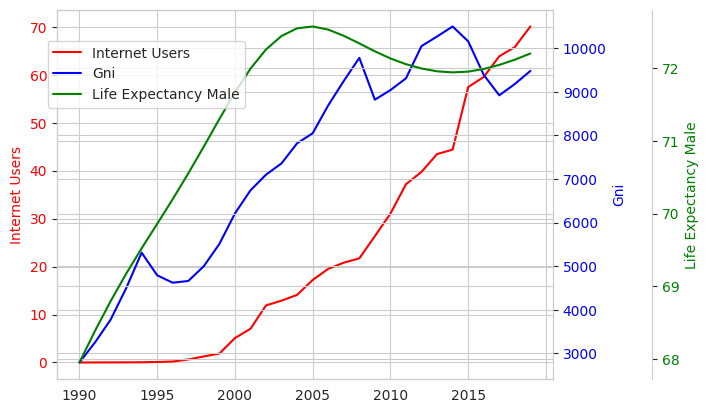

In [124]:
## con spines o mas valores sobre el eje dual

sns.set_style('whitegrid')

fig,ax1 = plt.subplots()

ax1.plot(mexico.index,mexico.values,label='Internet Users',color='r')
ax1.set_ylabel('Internet Users',color='r')
ax1.tick_params(axis='y',labelcolor='r')

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))
ax2.plot(gniMexico.index,gniMexico.values,label='Gni',color='b')
ax2.set_ylabel('Gni',color='b')
ax2.tick_params(axis='y',labelcolor='b')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes',1.2))
ax3.plot(LifeExpectancyMaleMexico.index,LifeExpectancyMaleMexico.values,label='Life Expectancy Male',color='g')
ax3.set_ylabel('Life Expectancy Male',color='g')
ax3.tick_params(axis='y',labelcolor='g')

fig.legend(bbox_to_anchor=(0.43,0.83))
ax1.set_xticks(np.arange(0,len(mexico)+1,5))


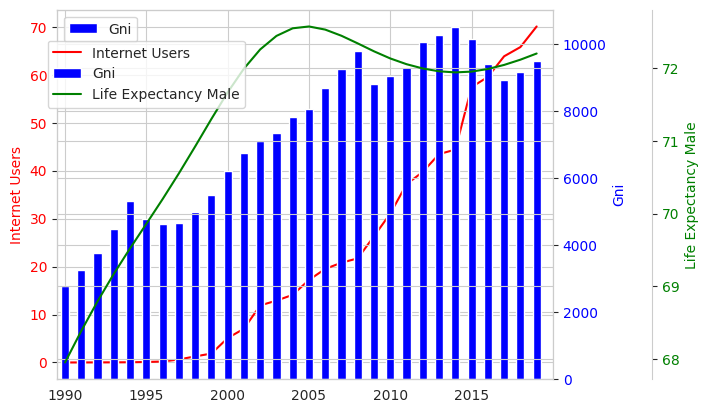

In [125]:
## con spines o mas valores sobre el eje dual

sns.set_style('whitegrid')

fig,ax1 = plt.subplots()

ax1.plot(mexico.index,mexico.values,label='Internet Users',color='r')
ax1.set_ylabel('Internet Users',color='r')
ax1.tick_params(axis='y',labelcolor='r')

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))
gniMexico.plot(kind='bar',ax=ax2,label='Gni',color='b')
##ax2.plot(gniMexico.index,gniMexico.values,label='Gni',color='b')
ax2.set_ylabel('Gni',color='b')
ax2.tick_params(axis='y',labelcolor='b')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('axes',1.2))
ax3.plot(LifeExpectancyMaleMexico.index,LifeExpectancyMaleMexico.values,label='Life Expectancy Male',color='g')
ax3.set_ylabel('Life Expectancy Male',color='g')
ax3.tick_params(axis='y',labelcolor='g')

fig.legend(bbox_to_anchor=(0.43,0.83))
ax1.set_xticks(np.arange(0,len(mexico)+1,5))
